In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('../data/train.csv', index_col=0, na_values='?')
test = pd.read_csv('../data/test.csv', index_col=0, na_values='?')

In [25]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [19]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,USA,Europe,Japan
mpg,1.000000,-0.739658,-0.605029,-0.261404,0.344398,0.422820,-0.496254,0.308269,0.345858
cylinders,-0.739658,1.000000,0.726896,0.289985,-0.371380,-0.295352,0.350823,-0.229142,-0.235964
displacement,-0.605029,0.726896,1.000000,0.349656,-0.314126,-0.375943,0.326890,-0.142799,-0.273705
weight,-0.261404,0.289985,0.349656,1.000000,0.023480,-0.230062,0.059226,0.129953,-0.168232
acceleration,0.344398,-0.371380,-0.314126,0.023480,1.000000,0.167045,-0.125639,0.188706,0.003308
model year,0.422820,-0.295352,-0.375943,-0.230062,0.167045,1.000000,-0.112756,0.018787,0.117610
USA,-0.496254,0.350823,0.326890,0.059226,-0.125639,-0.112756,1.000000,-0.532349,-0.764581
Europe,0.308269,-0.229142,-0.142799,0.129953,0.188706,0.018787,-0.532349,1.000000,-0.138585
Japan,0.345858,-0.235964,-0.273705,-0.168232,0.003308,0.117610,-0.764581,-0.138585,1.000000


In [29]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [30]:
df = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']]

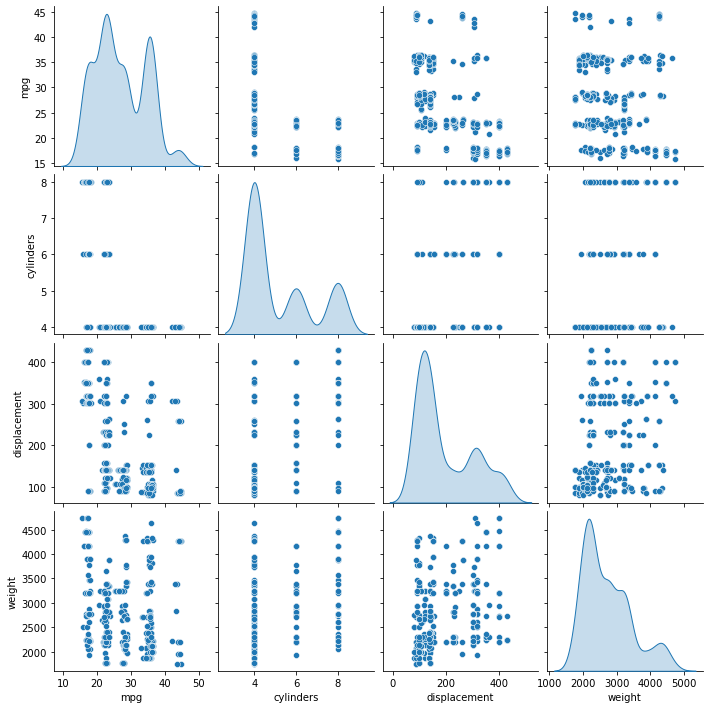

In [31]:
sns.pairplot(df[['mpg','cylinders','displacement','weight']], diag_kind='kde')

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 997
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           500 non-null    float64
 1   cylinders     500 non-null    int64  
 2   displacement  500 non-null    int64  
 3   horsepower    491 non-null    float64
 4   weight        500 non-null    int64  
 5   acceleration  500 non-null    float64
 6   model year    500 non-null    int64  
 7   origin        500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 55.2 KB


In [34]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,500.000000,500.000000,500.000000,491.000000,500.00000,500.000000,500.000000,500.000000
mean,27.010940,5.192000,194.762000,106.845214,2719.71400,15.300328,76.332000,1.420000
std,7.356249,1.617519,106.277425,35.599938,717.03541,2.261096,3.909007,0.759443
min,15.787613,4.000000,79.000000,54.000000,1755.00000,9.530859,70.000000,1.000000
25%,22.396641,4.000000,104.000000,85.000000,2178.75000,13.441562,73.000000,1.000000
50%,26.228984,4.000000,140.000000,97.000000,2615.00000,15.231923,76.000000,1.000000
75%,35.088333,6.000000,302.000000,132.000000,3193.00000,17.190531,80.000000,2.000000
max,44.763897,8.000000,429.000000,220.000000,4732.00000,21.922511,82.000000,3.000000


In [35]:
origin = df.pop('origin')

In [36]:
df['USA'] = (origin == 1) *1.0
df['Europe'] = (origin == 2) * 1.0
df['Japan'] = (origin == 3) * 1.0
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
id,,,,,,,,,,
981,22.798447,4,140,148.0,2835,13.477573,82,1.0,0.0,0.0
983,35.173640,4,97,67.0,2234,17.542681,80,0.0,0.0,1.0
994,17.825448,8,302,220.0,2774,15.177189,76,1.0,0.0,0.0
995,28.545147,4,97,150.0,2130,13.324669,70,1.0,0.0,0.0
997,36.011880,4,97,150.0,2300,15.364361,71,1.0,0.0,0.0


In [48]:
test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,
1,4,98,67,2000,15.049795,81,1,peugeot 504
2,4,97,90,2720,15.339172,79,1,dodge aspen
5,4,90,75,2807,17.821599,77,1,dodge monaco brougham
6,4,140,110,2807,13.780354,82,2,buick century limited
8,4,121,85,3070,13.688921,73,2,saab 99le
...,...,...,...,...,...,...,...,...
992,4,225,105,3870,15.376311,76,1,chevrolet nova
993,4,140,112,2720,13.616843,82,1,buick century limited
996,8,318,110,2774,13.272636,75,1,ford ltd


In [98]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.739658,-0.605029,-0.261404,0.344398,0.422820,0.454347
cylinders,-0.739658,1.000000,0.726896,0.289985,-0.371380,-0.295352,-0.317010
displacement,-0.605029,0.726896,1.000000,0.349656,-0.314126,-0.375943,-0.321787
weight,-0.261404,0.289985,0.349656,1.000000,0.023480,-0.230062,-0.116487
acceleration,0.344398,-0.371380,-0.314126,0.023480,1.000000,0.167045,0.073709
model year,0.422820,-0.295352,-0.375943,-0.230062,0.167045,1.000000,0.122374
origin,0.454347,-0.317010,-0.321787,-0.116487,0.073709,0.122374,1.000000


In [99]:
trainX = df[[ 'cylinders', 'displacement']]

In [103]:
Y = df['mpg']

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
trainX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 997
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   cylinders     500 non-null    int64
 1   displacement  500 non-null    int64
dtypes: int64(2)
memory usage: 11.7 KB


In [106]:
clf = LinearRegression()

In [107]:
clf.fit(trainX, Y)

LinearRegression()

In [81]:
testX = d

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
id,,,,,,,,
1,4,98,67,2000,15.049795,81,1,peugeot 504
2,4,97,90,2720,15.339172,79,1,dodge aspen
5,4,90,75,2807,17.821599,77,1,dodge monaco brougham
6,4,140,110,2807,13.780354,82,2,buick century limited
8,4,121,85,3070,13.688921,73,2,saab 99le
...,...,...,...,...,...,...,...,...
992,4,225,105,3870,15.376311,76,1,chevrolet nova
993,4,140,112,2720,13.616843,82,1,buick century limited
996,8,318,110,2774,13.272636,75,1,ford ltd


In [82]:
train

,mpg,cylinders,displacement,weight,acceleration,model year,origin
id,,,,,,,
0,23.059782,6,140,2815,17.977429,80,1
3,17.674521,8,350,4456,13.514535,72,1
4,17.136353,8,302,2774,13.209912,79,1
7,22.664666,6,400,2190,15.196381,71,1
9,17.872018,8,429,2245,9.621400,70,1
...,...,...,...,...,...,...,...
981,22.798447,4,140,2835,13.477573,82,1
983,35.173640,4,97,2234,17.542681,80,3
994,17.825448,8,302,2774,15.177189,76,1


In [83]:
train.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.739658,-0.605029,-0.261404,0.344398,0.422820,0.454347
cylinders,-0.739658,1.000000,0.726896,0.289985,-0.371380,-0.295352,-0.317010
displacement,-0.605029,0.726896,1.000000,0.349656,-0.314126,-0.375943,-0.321787
weight,-0.261404,0.289985,0.349656,1.000000,0.023480,-0.230062,-0.116487
acceleration,0.344398,-0.371380,-0.314126,0.023480,1.000000,0.167045,0.073709
model year,0.422820,-0.295352,-0.375943,-0.230062,0.167045,1.000000,0.122374
origin,0.454347,-0.317010,-0.321787,-0.116487,0.073709,0.122374,1.000000


In [84]:
testX = test[['cylinders', 'displacement', 'weight','acceleration', 'model year', 'origin']]

In [85]:
testX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     500 non-null    int64  
 1   displacement  500 non-null    int64  
 2   weight        500 non-null    int64  
 3   acceleration  500 non-null    float64
 4   model year    500 non-null    int64  
 5   origin        500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 47.3 KB


In [86]:
pred = clf.predict(testX)

In [88]:
sample = pd.read_csv('../data/sample.csv',header=None)

In [89]:
sample.head()

,0,1
0,1,0.0
1,2,0.0
2,5,0.0
3,6,0.0
4,8,0.0


In [91]:
sample[1] = pred

In [92]:
sample.head()

,0,1
0,1,31.037747
1,2,30.177166
2,5,30.053500
3,6,33.190973
4,8,29.640426


In [93]:
sample.to_csv('submit.csv', index=None, header=None)